In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.loadtxt('MNIST_Dataset/train_Data.txt')
y_train = np.loadtxt('MNIST_Dataset/train_lables.txt')
x_test = np.loadtxt('MNIST_Dataset/test_Data.txt')
y_test = np.loadtxt('MNIST_Dataset/test_lables.txt')

5.0


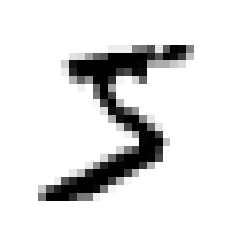

In [3]:
plt.imshow(x_train[0, :].reshape(28, 28), 'binary')
plt.axis('off')
print(y_train[0])

# a) PCA

In [4]:
def pca(x, d):
    x_train = x.copy()
    x_centered = x_train - x_train.mean(0)
    cov = np.cov(x_centered, rowvar = False)
    lamda, v = np.linalg.eigh(cov)
    id = np.argsort(lamda)[::-1]
    return x_centered @ v[:, id[:d]]

# b)

In [5]:
def pca(x, d = None, percent = None):
    x_train = x.copy()
    mu = x_train.mean(0)
    x_centered = x_train - mu
    cov = np.cov(x_centered, rowvar = False)
    lamda, v = np.linalg.eigh(cov)
    id = np.argsort(lamda)[::-1]
    if percent != None:
        d = np.where(np.cumsum(lamda[id]/lamda.sum())>(percent/100))[0][0]
    else:
        if d == None:
            raise ValueError("d should be filled with an int")
    return x_centered @ v[:, id[:d]], mu, (v[:, id[:d]], lamda[:d])

In [6]:
x, mu, (v, lamda) = pca(x_train, percent=95)
x.shape

(10000, 150)

==> d = 150

# c) reconstruction

In [7]:
def reconstruct(x, v, mu):
    return (x @ v.T) + mu

In [8]:
def pca_re(x):
    x_train = x.copy()
    mu = x_train.mean(0)
    x_centered = x_train - mu
    cov = np.cov(x_centered, rowvar = False)
    lamda, v = np.linalg.eigh(cov)
    id = np.argsort(lamda)[::-1]
    return x_centered, (v, lamda), id, mu

In [9]:
try:
    mse = np.load('mse.npy')
except:
    mse = np.array([])
if not mse.any():
    mse = np.zeros(x_train.shape[1], dtype='float')
    x_centered, (v, lamda), id, mu = pca_re(x_train)
    for i in np.arange(1, x_train.shape[1]+1):
        x = x_centered @ v[:, id[:i]]
        x = reconstruct(x, v[:, id[:i]], mu)
        mse[i-1] = np.square(x - x_train).mean()
    np.save('mse.npy', mse)

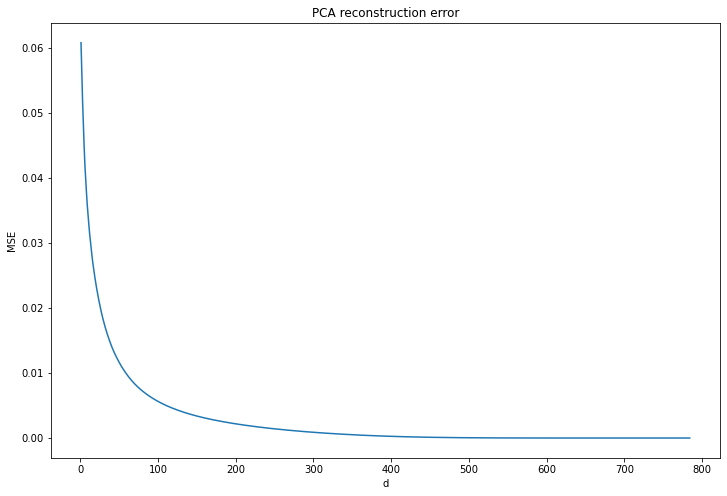

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, x_train.shape[1]+1), mse)
plt.title('PCA reconstruction error')
plt.xlabel('d')
plt.ylabel('MSE');

همانگونه که اتظار داشتیم هر چه تعداد ویژگی بیشتری برای ساختن دوباره ایکس برداریم، مقادیر به دست آمده به ایکس اصلی نزدیک تر است. 

# d)

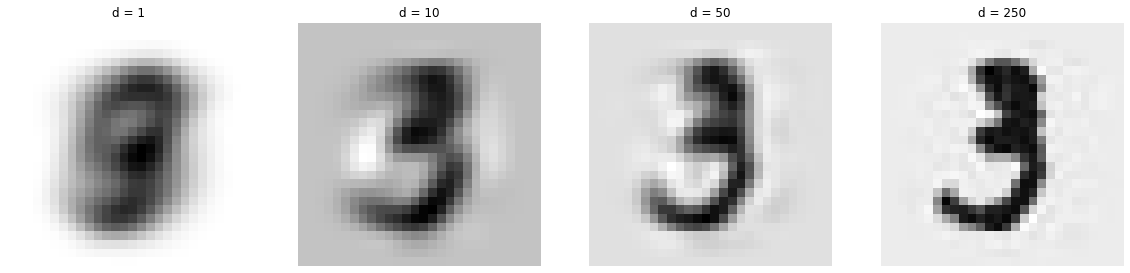

In [11]:
r = [1, 10, 50, 250, 784]
fig, axs = plt.subplots(1, len(r), figsize = (20, 6))
mse = np.zeros(x_train.shape[1], dtype='float')
x_centered, (v, lamda), id, mu = pca_re(x_train)
for i, ax in zip(r, axs.flat):
    x = x_centered @ v[:, id[:i]]
    x = reconstruct(x, v[:, id[:i]], mu)
    ax.imshow(x[10, :].reshape(28, 28), 'binary')
    ax.set_title(f'd = {i}')
    ax.axis(False)

همانگونه که انتظار داشتیم پیکسل هایی که حاوی اطلاعات کمتری بودند مانند فضا های سفید با برداشتن تعداد کمتری از آیگن وکتور ها مقدار خود را از دست میدهند و یک مقدار تقریبا رندم میگیرند. و در عوض پیکسل هایی که اطلاعات بیشتری دارند، شکل خود را بیشتر حفظ میکنند.

# e)

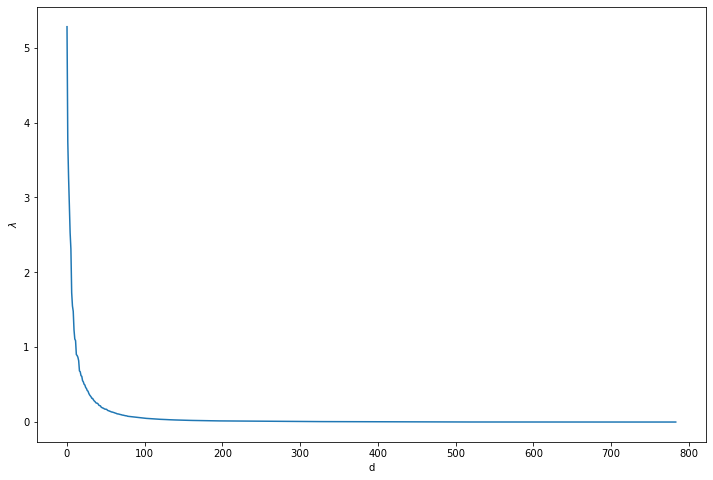

In [52]:
x_centered, (v, lamda), id, mu = pca_re(x_train)
plt.figure(figsize = (12, 8))
plt.plot(lamda[id]);
plt.xlabel('d')
plt.ylabel('$\lambda$');

همانگونه که انتظار داشتیم،‌چند مقدار ویژه ابتدایی بزرگترین مقدار ها از کل مقادیر است و این به خوبی در نمودار قابل مشاهده است و هر چه به تعداد ابعاد اضافه میشود، از مقادیر مقدار ویژه کم میشود